<a href="https://colab.research.google.com/github/Rao-Kai/dl_pytorch/blob/main/chapter3_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from d2l import torch as d2l
import torch
import random 

In [2]:
def synthetic_date(w, b, num_examples):
  X = torch.normal(0, 1, (num_examples, len(w)))
  y = torch.matmul(X, w) + b
  y += torch.normal(0, 0.01, y.shape)
  return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
feature, labels = synthetic_date(true_w, true_b, 1000)

In [3]:
print('feature:', feature[0], '\nlable', labels[0])

feature: tensor([-0.1032,  0.7349]) 
lable tensor([1.5055])


torch.Size([1000, 2])

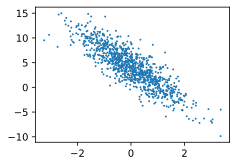

In [4]:
d2l.set_figsize()
d2l.plt.scatter(feature[:,1].detach().numpy(),
                labels.detach().numpy(), 1)
feature.size()

In [5]:
def data_iter(batch_size, feature, labels):
  num_examples = len(feature)
  indices = list(range(num_examples))
  random.shuffle(indices)
  for i in range(0, num_examples, batch_size):
    batch_indices = torch.tensor(indices[i:min(i+batch_size, num_examples)])
    yield feature[batch_indices], labels[batch_indices]
  
batch_size = 10

for X, y in data_iter(batch_size, feature, labels):
  print(X, '\n', y)
  break

len(feature)

tensor([[-0.6337,  1.5027],
        [-0.7040,  1.3011],
        [-0.3162,  0.8736],
        [ 0.5572, -0.0465],
        [ 0.5794,  0.1329],
        [ 0.5967,  0.0032],
        [-1.3197, -0.6418],
        [ 0.2230,  1.5733],
        [ 0.4665,  2.4323],
        [ 0.6870,  0.8135]]) 
 tensor([[-2.1741],
        [-1.6559],
        [ 0.6031],
        [ 5.4756],
        [ 4.9043],
        [ 5.3926],
        [ 3.7303],
        [-0.6824],
        [-3.1227],
        [ 2.8121]])


1000

In [6]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
w, b

(tensor([[-0.0152],
         [-0.0075]], requires_grad=True), tensor([0.], requires_grad=True))

In [7]:
def linreg(X, w, b):
  return torch.matmul(X, w) + b

In [8]:
def squared_loss(y_hat, y):
  return (y_hat - y.reshape(y_hat.shape))**2 / 2

In [9]:
def sgd(params, lr, batch_size):
  with torch.no_grad():
    for param in params:
      param -= lr * param.grad / batch_size
      param.grad.zero_()

In [10]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
  for X, y in data_iter(batch_size, feature, labels):
    l = loss(net(X, w, b), y)
    l.sum().backward()
    sgd([w, b], lr, batch_size)
  with torch.no_grad():
    train_l = loss(net(feature, w, b), labels)
    print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.040953
epoch 2, loss 0.000146
epoch 3, loss 0.000049
